<a href="https://colab.research.google.com/github/ddesai-sjsu/Data-Mining/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment1: Data Cleaning**

**Dataset:** "Hotel booking demand" from Kaggle 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [70]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [71]:
df= pd.read_csv('/content/hotel_bookings.csv')


In [72]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [73]:
df.shape

(119390, 32)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

1. As listed above, the datatype of reservation_status_date column is object and not datetime. So, i converted the datatype of this column to datetime.


In [75]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [76]:
type(df['reservation_status_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

2. Adding another column 'arrival_date', which will specify arrival date, year & month

In [77]:
df['arrival_date'] = pd.to_datetime(df.arrival_date_year.astype(str) + '/' + df.arrival_date_month.astype(str) + '/' + df.arrival_date_day_of_month.astype(str))

In [42]:
df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [43]:
df.shape

(119390, 33)

In [44]:
df['arrival_date'][0]

Timestamp('2015-07-01 00:00:00')

3. Finding all the columns that have missing values and finding number missing values in each column.

In [78]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can also find the index of the missing values.

In [79]:
df.children[df.children != df.children].index.values

array([40600, 40667, 40679, 41160])

4. Removing columns with missing values.

If more than 70% of values in a column are missing and if there is no way in filling the values, then we can drop the entire column from the entire dataset, as shown below. So company column will be dropped.
 

In [80]:
for col in df.columns:
    if df[col].isnull().sum()>(df.shape[0] * 0.7):
        df.drop(columns=col, inplace=True, axis=1)
print(df.shape)

(119390, 32)


In [81]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


5. Since we already have arrival_date column, there is no point in having redundant columns like arrival_date_week_number, arrival_date_year etc.

In [82]:
df.drop(columns=["arrival_date_week_number", "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"],
           inplace=True, axis=1)

6. Removing unwanted rows: If only some rows have missing values in a column, instead of deleting the entire column, its better to remove the rows, as shown below.

In [84]:
df.dropna(subset=["agent"], inplace=True)
df.shape

(103050, 28)

In [85]:
df.shape

(103050, 28)

7. We can also fill the missing values with appropriate values. For example, children column has some missing values. So we will the missing values with mean of all the values.



In [86]:
df["children"].fillna(value = df["children"].mean(), inplace=True)
df["children"] = df["children"].apply(np.floor)
print(f"Total missing values in children column after filling = {np.sum(df.children.isnull())}")

Total missing values in children column after filling = 0


In [87]:
arr=["market_segment", "distribution_channel", "meal", "country"]
print("No of missing values are")
for x in arr:
    df[x].fillna(method="bfill", inplace=True)
    print(f"{x}: {np.sum(df[x].isnull())}")

No of missing values are
market_segment: 0
distribution_channel: 0
meal: 0
country: 0


In [88]:
np.sum(df.isnull())

hotel                             0
is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
arrival_date                

### **Data Visualization**

In [55]:
df_visualization= pd.read_csv('/content/hotel_bookings.csv')


In [56]:
cat = [cat for cat in df_visualization if(df_visualization[cat].dtype =='O')]
print(len(cat))
cat

12


['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [58]:
num = [num for num in df_visualization if(df_visualization[num].dtype !='O')]
print(len(num))
num

20


['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [57]:
for i in cat:
    print(df_visualization[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
BHS        1
NIC        1
PLW        1
NPL        1
ASM        1
Name: country, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
A   

In [59]:
df_not_cancelled = df_visualization[df_visualization['is_canceled']==0]
df_cancelled = df_visualization[df_visualization['is_canceled']==1]

In [60]:
df_not_cancelled['country'].value_counts()

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
       ...  
PYF        1
NCL        1
BHS        1
SYC        1
MLI        1
Name: country, Length: 165, dtype: int64

Plotting the Country vs count of booking(not cancelled)
 using bar chart

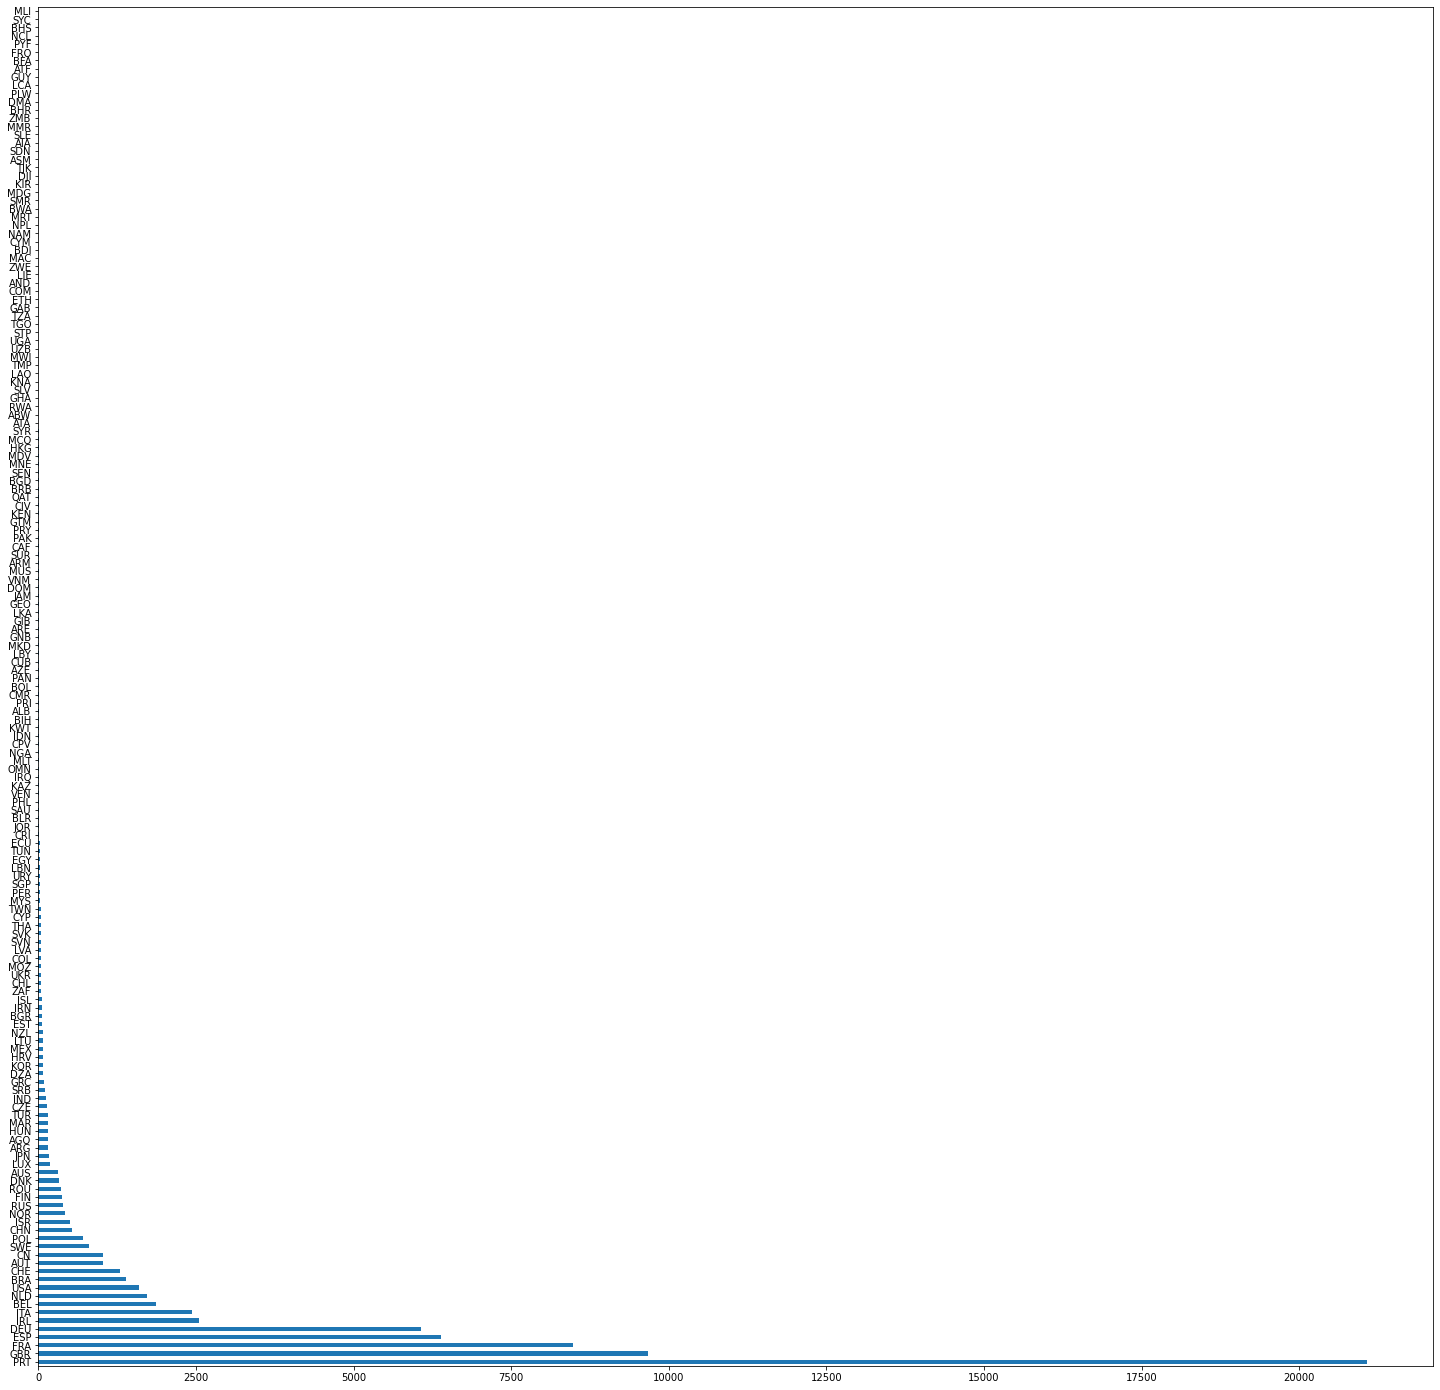

In [90]:
df_not_cancelled['country'].value_counts().plot.barh(figsize=(25,25))

Plotting the year vs count of booking
 using bar chart

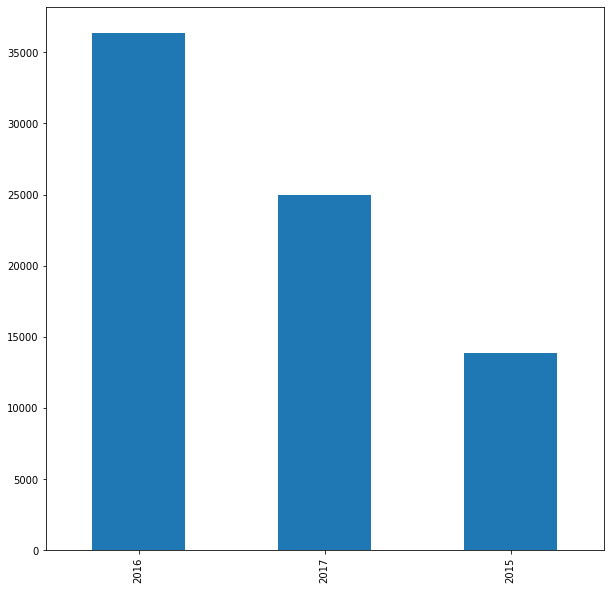

In [91]:
df_not_cancelled.arrival_date_year.value_counts().plot.bar(figsize=(10,10))

In [92]:
df_2015 = df_not_cancelled[df_not_cancelled['arrival_date_year']==2015]
df_2016 = df_not_cancelled[df_not_cancelled['arrival_date_year']==2016]
df_2017 = df_not_cancelled[df_not_cancelled['arrival_date_year']==2017]

Hotel and month vs booking in 2015


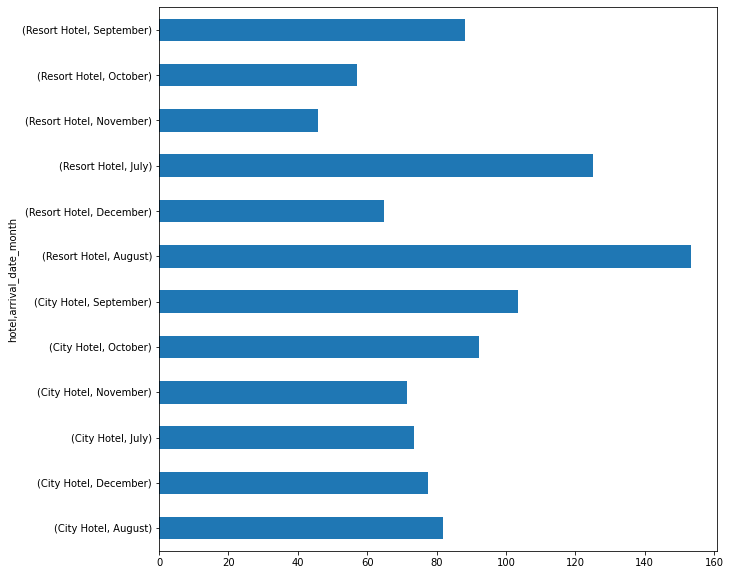

In [93]:
df_2015.groupby(['hotel','arrival_date_month'])['adr'].mean().plot.barh(figsize=(10,10))

Hotel and month vs booking in 2016


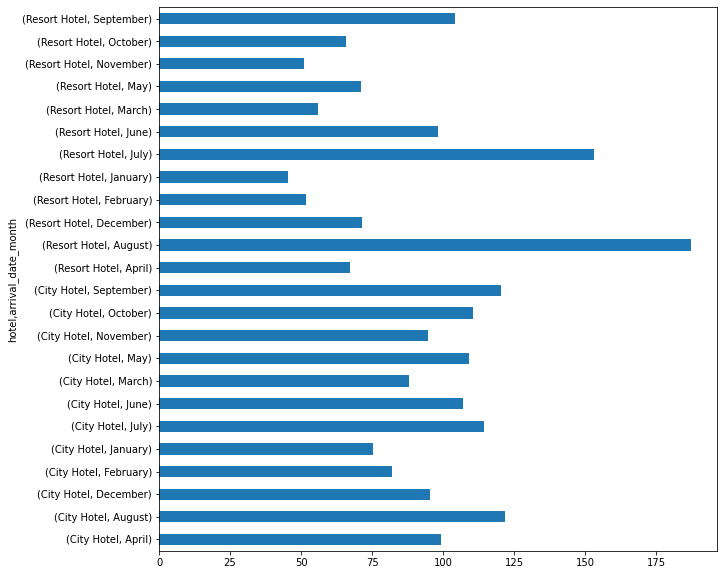

In [65]:
df_2016.groupby(['hotel','arrival_date_month'])['adr'].mean().plot.barh(figsize=(10,10))

Hotel and month vs booking in 2017


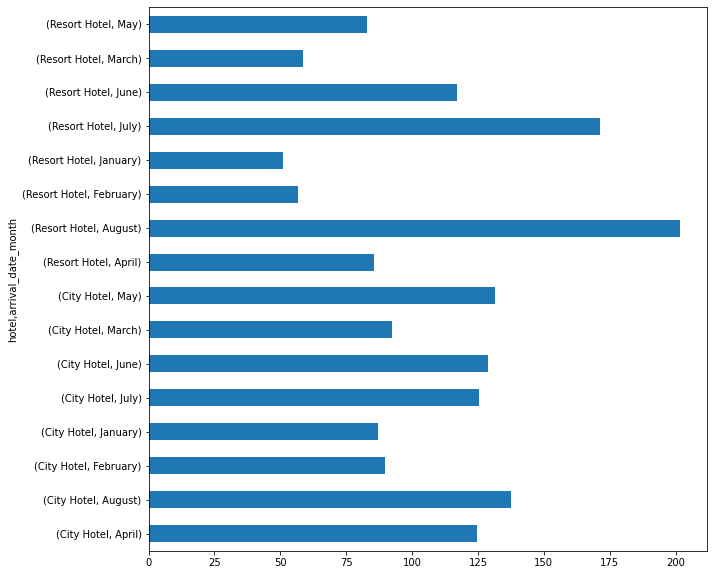

In [66]:
df_2017.groupby(['hotel','arrival_date_month'])['adr'].mean().plot.barh(figsize=(10,10))

Heat map coreleation matrix

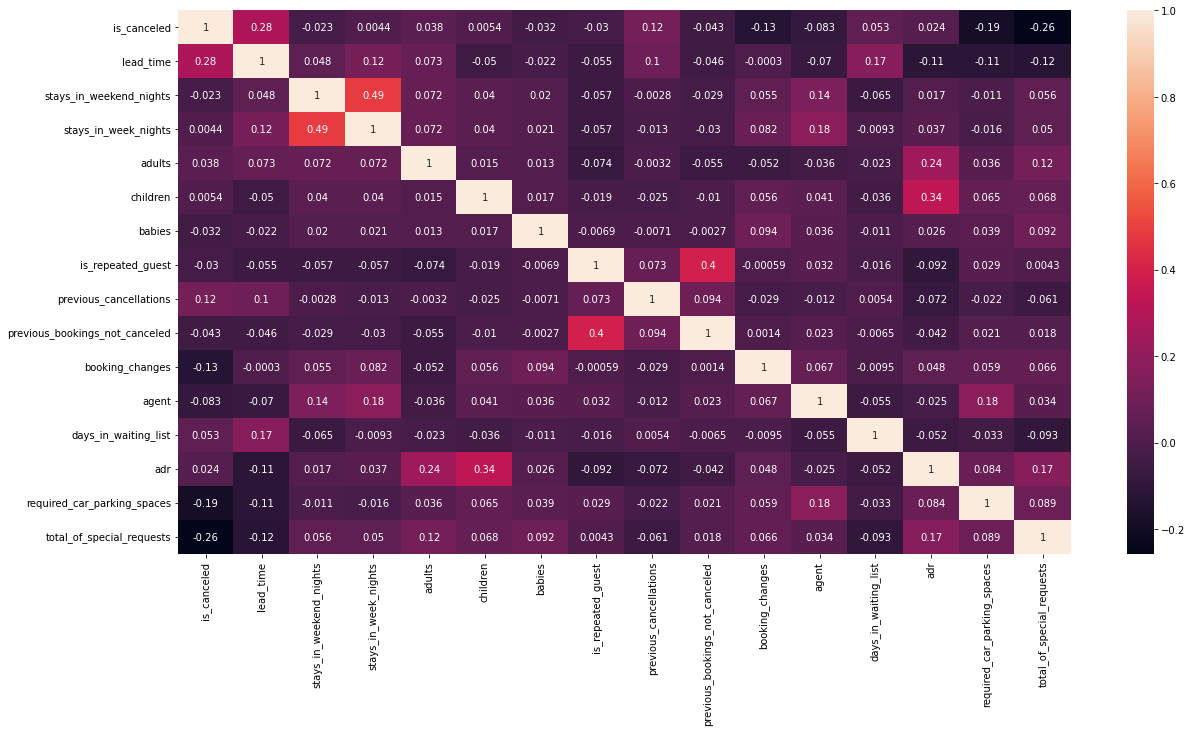

In [68]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)